<a href="https://colab.research.google.com/github/ojaswichoudhary/apple-stock/blob/main/Apple_stock_price_predictor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

/tmp/ipython-input-2105719781.py:18: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download('AAPL', start='2015-01-01', end='2024-01-01')
[*********************100%***********************]  1 of 1 completed

Price           Close       High        Low       Open     Volume
Ticker           AAPL       AAPL       AAPL       AAPL       AAPL
Date                                                             
2015-01-02  24.261047  24.729270  23.821672  24.718174  212818400
2015-01-05  23.577579  24.110156  23.391179  24.030269  257142000
2015-01-06  23.579788  23.839418  23.218079  23.641922  263188400
2015-01-07  23.910433  24.010290  23.677430  23.788384  160423600
2015-01-08  24.829132  24.886828  24.121249  24.238861  237458000



/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 60, 50)         │        10,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 60, 50)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 50)             │        20,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 50)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 25)             │         1,275 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │            26 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 31,901 (124.61 KB)

 Trainable params: 31,901 (124.61 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 6s 85ms/step - loss: 0.0295 - val_loss: 0.0035
Epoch 2/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 2s 64ms/step - loss: 0.0018 - val_loss: 0.0015
Epoch 3/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 3s 88ms/step - loss: 0.0013 - val_loss: 0.0015
Epoch 4/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 2s 84ms/step - loss: 9.1812e-04 - val_loss: 0.0016
Epoch 5/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 2s 64ms/step - loss: 6.6912e-04 - val_loss: 0.0011
Epoch 6/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 2s 64ms/step - loss: 7.8123e-04 - val_loss: 0.0017
Epoch 7/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 2s 66ms/step - loss: 7.0141e-04 - val_loss: 8.5356e-04
Epoch 8/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 3s 66ms/step - loss: 6.7084e-04 - val_loss: 0.0031
Epoch 9/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 2s 64ms/step - loss: 7.2840e-04 - val_loss: 0.0033
Epoch 10/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 3s 106ms/step - loss: 6.9017e-04 - val_loss: 0.0015
Epoch 11/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 2s 65ms/step - loss: 6.6581e-04 - val_loss: 7.7848e-04
Epoch 12/20
25/25 ━━━━

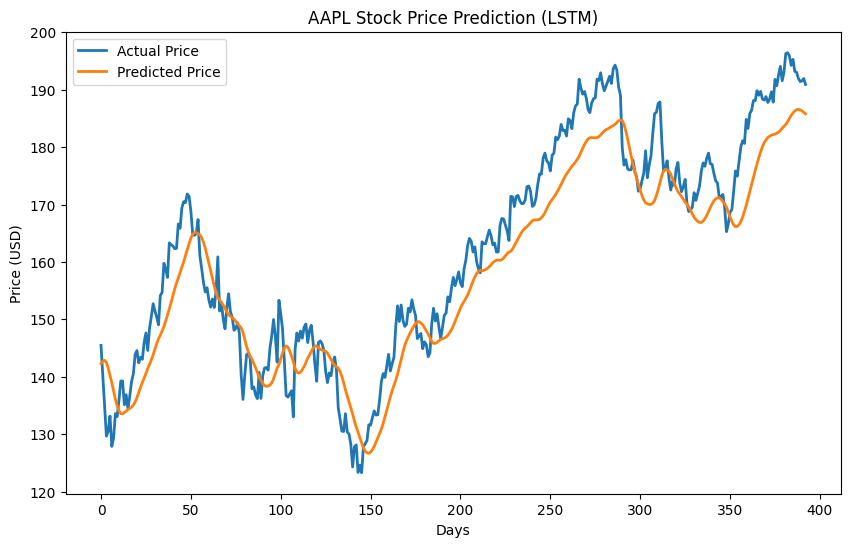

Mean Squared Error: 45.4823


In [1]:
# Install & Import Libraries
!pip install yfinance tensorflow numpy pandas matplotlib

import yfinance as yf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout

# Download Stock Data
df = yf.download('AAPL', start='2015-01-01', end='2024-01-01')
print(df.head())


# Prepare Data
data = df[['Close']].values  # Use closing price only
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(data)

train_size = int(len(scaled_data) * 0.8)
train_data = scaled_data[:train_size]
test_data = scaled_data[train_size:]

# Create sequences of 60 timesteps
def create_dataset(dataset, time_step=60):
    X, y = [], []
    for i in range(time_step, len(dataset)):
        X.append(dataset[i - time_step:i, 0])
        y.append(dataset[i, 0])
    return np.array(X), np.array(y)

X_train, y_train = create_dataset(train_data)
X_test, y_test = create_dataset(test_data)

# Reshape for LSTM: (samples, timesteps, features)
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))


# Build LSTM Model
model = Sequential([
    LSTM(50, return_sequences=True, input_shape=(X_train.shape[1], 1)),
    Dropout(0.2),
    LSTM(50, return_sequences=False),
    Dropout(0.2),
    Dense(25),
    Dense(1)
])

model.compile(optimizer='adam', loss='mean_squared_error')
model.summary()


# Train the Model
history = model.fit(X_train, y_train, batch_size=64, epochs=20, validation_split=0.1)


# Make Predictions
predictions = model.predict(X_test)
predictions = scaler.inverse_transform(predictions)
real_prices = scaler.inverse_transform(y_test.reshape(-1, 1))


# Visualize Results
plt.figure(figsize=(10,6))
plt.plot(real_prices, label='Actual Price', linewidth=2)
plt.plot(predictions, label='Predicted Price', linewidth=2)
plt.title('AAPL Stock Price Prediction (LSTM)')
plt.xlabel('Days')
plt.ylabel('Price (USD)')
plt.legend()
plt.show()


# Evaluate Model
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(real_prices, predictions)
print(f"Mean Squared Error: {mse:.4f}")
